<a href="https://colab.research.google.com/github/bailejor/SAMSHA_Transfer_Learning/blob/main/KerasSamshaTransfer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import os
import keras
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.layers import Dense, GlobalAveragePooling2D
from keras.applications import MobileNetV2, ResNet50, Xception
from keras.preprocessing import image
from keras.applications.mobilenet import preprocess_input
from keras.preprocessing import image_dataset_from_directory
from keras.models import Model
from keras.optimizers import Adam

In [ ]:


input_t = keras.Input(shape=(250, 250, 3))
base_model = keras.applications.ResNet50(input_tensor=input_t, include_top=False, weights='imagenet') 
base_model.trainable = False



inputs = keras.Input(shape=(250, 250, 3))
x = base_model(inputs, training = False)
x = keras.layers.GlobalAveragePooling2D()(x)
outputs = keras.layers.Dense(1, activation='sigmoid')(x)
model = keras.Model(inputs, outputs)

model.compile(loss = keras.losses.BinaryCrossentropy(from_logits=True), optimizer = keras.optimizers.Adam(),
              metrics=[keras.metrics.AUC(), keras.metrics.BinaryAccuracy()])

class_weight = {0:35,
                1:65}
#step_size_train = len(train_dataset)/32
#val_size = len(validation_dataset) / 32
history = model.fit(train_dataset, epochs = 20, verbose = 1, validation_data = validation_dataset, class_weight = class_weight)

94773248/94765736 [==============================] - 2s 0us/step
Epoch 1/20
5043/5043 [==============================] - 1022s 199ms/step - loss: 27.5827 - auc: 0.7137 - binary_accuracy: 0.6736 - val_loss: 0.5310 - val_auc: 0.7686 - val_binary_accuracy: 0.7438
Epoch 2/20
5043/5043 [==============================] - 858s 170ms/step - loss: 26.1537 - auc: 0.7531 - binary_accuracy: 0.7025 - val_loss: 0.6596 - val_auc: 0.7745 - val_binary_accuracy: 0.6011
Epoch 3/20
5043/5043 [==============================] - 846s 168ms/step - loss: 25.9205 - auc: 0.7587 - binary_accuracy: 0.7049 - val_loss: 0.5132 - val_auc: 0.7774 - val_binary_accuracy: 0.7542
Epoch 4/20
5043/5043 [==============================] - 846s 168ms/step - loss: 25.7977 - auc: 0.7621 - binary_accuracy: 0.7069 - val_loss: 0.5982 - val_auc: 0.7794 - val_binary_accuracy: 0.6672
Epoch 5/20
5043/5043 [==============================] - 855s 170ms/step - loss: 25.7712 - auc: 0.7628 - binary_accuracy: 0.7072 - val_loss: 0.6192 - val_a

Found 161345 files belonging to 2 classes.
Found 161346 files belonging to 2 classes.


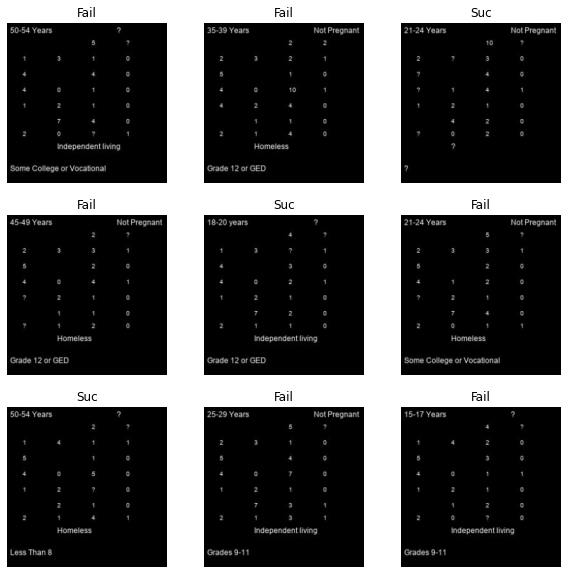

In [ ]:

train_dataset = image_dataset_from_directory('/content/ValImagesWords.nosync', image_size=(250, 250), color_mode='rgb', batch_size = 32, shuffle=True)


validation_dataset = image_dataset_from_directory('/content/TestImagesWords.nosync', image_size=(250, 250), color_mode='rgb', batch_size = 32,  shuffle=True)

class_names = train_dataset.class_names
plt.figure(figsize=(10, 10))
for images, labels in train_dataset.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i+ 1)
    plt.imshow(images[i].numpy().astype('uint8'))
    plt.title(class_names[labels[i]])
    plt.axis('off')


In [ ]:
!unzip /content/drive/MyDrive/ValImagesWords.nosync.zip

In [ ]:
!unzip /content/drive/MyDrive/TestImagesWords.nosync.zip